# Lab 6: The Leontief Input-Output Model
     
MTH 308: Applied Linear Algebra <br>
Spring 2022

Lab parts: 
- Part 1: Basic Leontief input-output model example, Exercise 1
- Part 2: Efficient calculation of production vector, Exercise 2
- Part 3: Large scale example, Exercise 3

## Instructions

Run each of the coding cells. For example cells, understand the commands and check that the outputs make sense. For exercise cells, write your own code where indicated to generate the correct output.

<u>Submission:</u> Complete the following notebook in order. Once done, print the notebook and save as an HTML file. Upload your submission to the Canvas course page.

<u>Rubric:</u> 15 total points, 3 points to running example cells and saving outputs, 4 points per exercise block with correct output saved.

<u>Deadline:</u> Monday at midnight after the lab is assigned.

## Part 1: Introduction to Leontief Input-Output Model, Exercise 1

Here we implement a famous linear model from economics: https://en.wikipedia.org/wiki/Input%E2%80%93output_model

#### Model explanation

Define the *production vector* $\vec{x}$ in $\mathbb{R}^n$ as the amount of goods or services produced by $n$ sectors of a nation's economy. Then, balancing production with demand, we have
$$
\vec{x} = C\vec{x} + \vec{d}
$$
where $\vec{d}$ is the *final demand* by consumer sectors (people, government, education, etc) and $C\vec{x}$ computes the *intermediate demand* consumed by producing sectors. Below is a depiction of this idea.

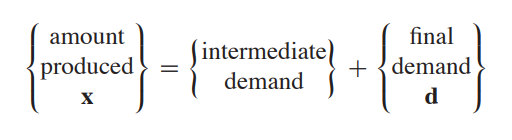

Solving this system by hand, we get
$$
\vec{x} = C\vec{x} + \vec{d} \quad \rightarrow \quad
I\vec{x} - C\vec{x} = \vec{d} \quad \rightarrow \quad
(I-C)\vec{x} = \vec{d} \quad \rightarrow \quad
\vec{x} = (I-C)^{-1}\vec{d}
$$
assuming $(I-C)$ is invertible.

#### Exercise 1: Mini-economy

Consider an economy of 3 sectors with *intermediate demand* found historically to be

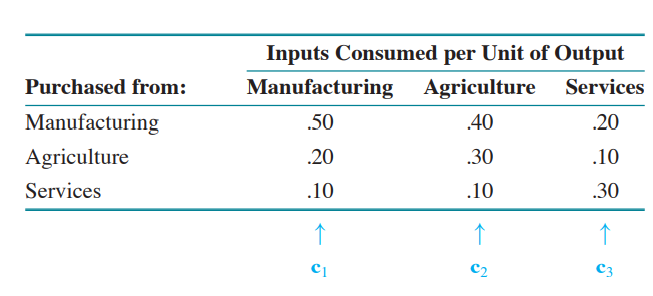

and *final demand* as 50 units manufacturing, 30 units agriculture, and 20 units services. Use the coding block below to find the *production vector* $\vec{x}$ which will satisfy this demand.


In [1]:
##################
# EXERCISE CELL
##################

library(matlib)

##########################
# beginning of your code

C <- matrix(c(.5, .4, .2,
             .2, .3, .1,
             .1, .1, .3), nrow=3, ncol=3, byrow=TRUE)
I <- diag(3)
d <-c(50, 30, 20)


x <- inv(I-C) %*% d

print("Production vector")
print(x)
print("Intermediate demand")
print(C %*% x)

# end of your code
##########################

Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”


Warning message:
“'rgl.init' failed, running with 'rgl.useNULL = TRUE'.”


[1] "Production vector"


          [,1]
[1,] 225.92593
[2,] 118.51852
[3,]  77.77778


[1] "Intermediate demand"


          [,1]
[1,] 175.92593
[2,]  88.51852
[3,]  57.77778


#### Solution explanation.

Explain your findings from the above exercise cell coding block including a discussion of both the production vector and intermediate demands.

Solving the equation as above, we see the needed production is 225.9 units for Manufacturing, 118.5 units for Ag, and 77.8 units for Services. The intermediate demands for each are 175.9 units for Manufacturing, 88.5 units for Ag, and 57.8 units for Services.

## Part 2: Efficient production vector calculation, Exercise 2

There is an alternate approach to computing production vector $\vec{x}$ without needing to find the inverse of a matrix. For large enough systems, this can be more efficient computationally. Read the below explanation from the textbook.
<br />
<br />
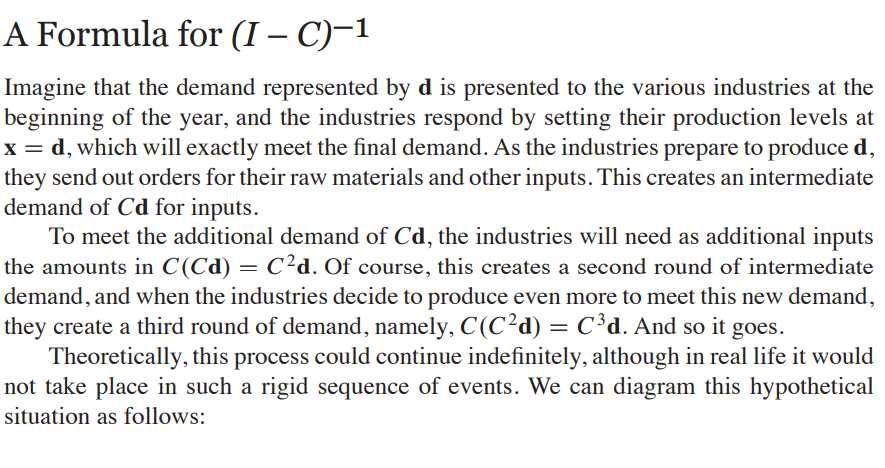
<br />
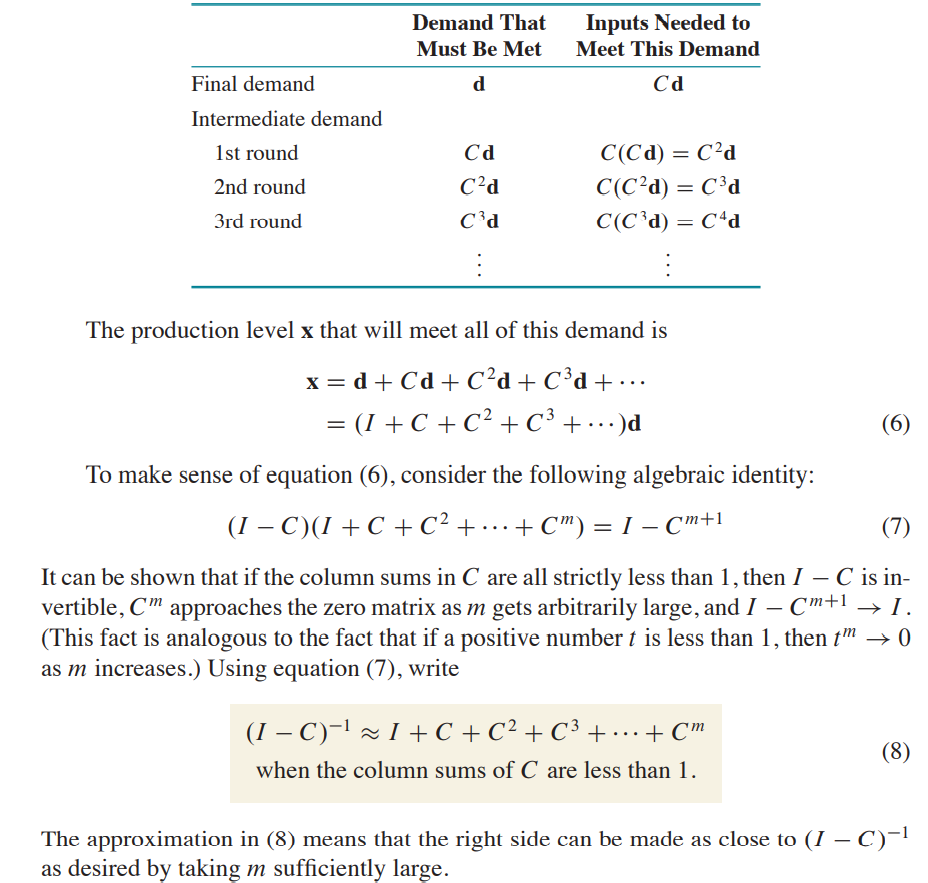
<br />
<br />
Note, equation 8 resembles the formula of a geometric series from Calculus 2 (https://en.wikipedia.org/wiki/Geometric_series).

#### Exercise 2: Efficient production vector calculation

Use the below coding block to find the production vector from Exercise 1 using formula (6) from the textbook explanation above. Note, this is an approximate approach and you will need to create a rule for your calculation to stop.

In [2]:
##################
# EXERCISE CELL
##################

##########################
# beginning of your code

demandIter <- function(C,d,precision,maxIter){
    x <- d
    for (i in c(1:maxIter)){
        xprev <- x
        x <- d + C%*%x
        if (max(abs(x-xprev))<precision){
            return(list(x,i))
        }
    }
    return(list(x,i))
}


C <- matrix(c(.5, .4, .2,
             .2, .3, .1,
             .1, .1, .3), nrow=3, ncol=3, byrow=TRUE)
d <-c(50, 30, 20)

precision <- 0.01
maxIter <- 100

result <- demandIter(C,d, precision, maxIter)

x <- result[[1]]
iterUsed <- result[[2]]

print("Production vector via iteration:")
print(x)
print(paste("Iterations used to obtain precision ", precision))
print(iterUsed)

# end of your code
##########################


[1] "Production vector via iteration:"


          [,1]
[1,] 225.90081
[2,] 118.50596
[3,]  77.76967


[1] "Iterations used to obtain precision  0.01"


[1] 33


#### Solution explanation.

Explain your findings in the above coding block here.

See above coding output.

## Part 3: Large scale example, Exercise 3

Here you will explore a larger scale example.

#### Exercise 3: Large scale example

Solve the following two textbook exercises.
<br />
<br />
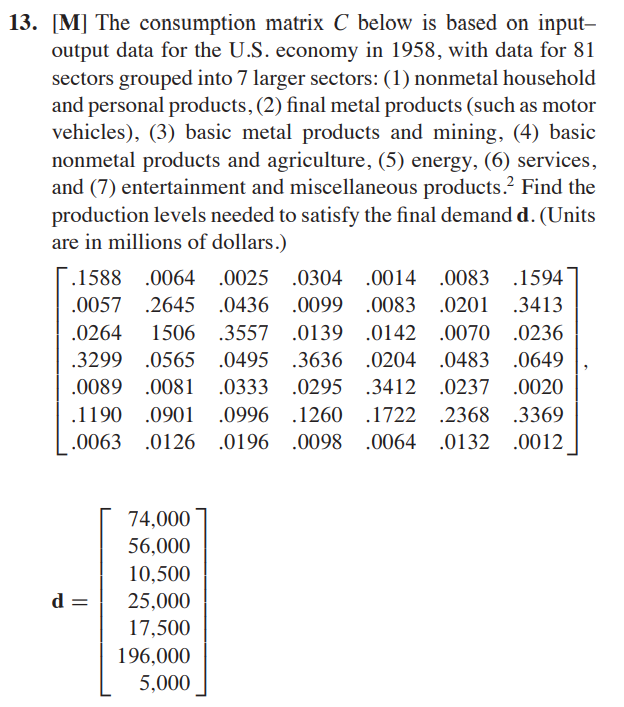
<br />
<br />
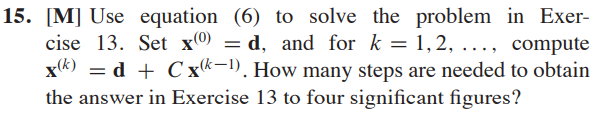
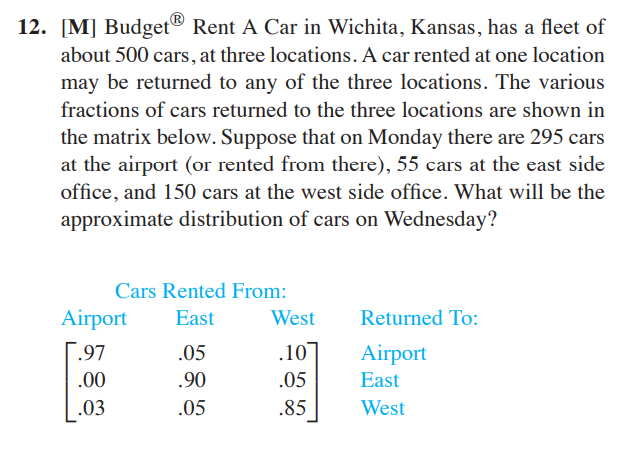

In [3]:
##################
# EXERCISE CELL FOR PROBLEM 13
##################

C <- matrix(c(.1588,.0064,.0025,.0304,.0014,.0083,.1594,
.0057,.2645,.0436,.0099,.0083,.0201,.3413,
.0264,.1506,.3557,.0139,.0142,.0070,.0236,
.3299,.0565,.0495,.3636,.0204,.0483,.0649,
.0089,.0081,.0333,.0295,.3412,.0237,.0020,
.1190,.0901,.0996,.1260,.1722,.2368,.3369,
.0063,.0126,.0196,.0098,.0064,.0132,.0012), nrow=7, ncol=7, byrow=TRUE)

d <- c(74000,56000,10500,25000,17500,196000,5000)

##########################
# beginning of your code
I <- diag(nrow(C))

x <- inv(I-C) %*% d

print("Production vector")
print(x)
print("Intermediate demand")
print(C %*% x)

# end of your code
##########################

[1] "Production vector"


          [,1]
[1,]  99575.65
[2,]  97703.02
[3,]  51230.52
[4,] 131569.92
[5,]  49488.49
[6,] 329554.45
[7,]  13835.33


[1] "Intermediate demand"


           [,1]
[1,]  25575.653
[2,]  41703.022
[3,]  40730.523
[4,] 106569.922
[5,]  31988.492
[6,] 133554.452
[7,]   8835.336


In [4]:
##################
# EXERCISE CELL FOR PROBLEM 15
##################

##########################
# beginning of your code

precision <- 0.00001
maxIter <- 100

result <- demandIter(C,d, precision, maxIter)

x <- result[[1]]
iterUsed <- result[[2]]

print("Production vector via iteration:")
print(x)
print(paste("Iterations used to obtain precision ", precision))
print(iterUsed)

# end of your code
##########################

[1] "Production vector via iteration:"


          [,1]
[1,]  99575.65
[2,]  97703.02
[3,]  51230.52
[4,] 131569.92
[5,]  49488.49
[6,] 329554.45
[7,]  13835.34


[1] "Iterations used to obtain precision  1e-05"


[1] 36


#### Solution explanation.

Explain your findings from the above coding blocks here.

See above coding output.